In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df['target'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='target', ylabel='count'>

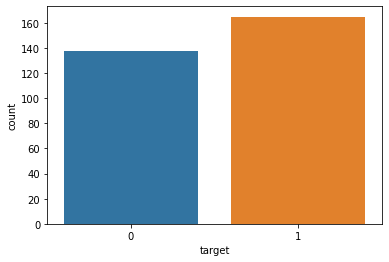

In [3]:
#checking the presensce of different kinds of heart disease
sns.countplot(x='target',data=df) #0=no heart disease , 1= has heart disease

In [6]:
features = df.drop('target',axis=1)
features.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

<AxesSubplot:>

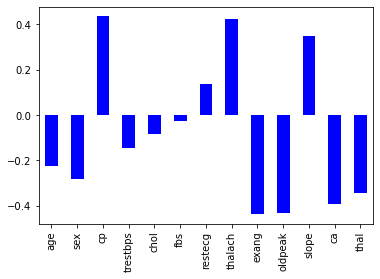

In [7]:
features.corrwith(df['target']).plot(kind='bar',color='blue')

Text(0.5, 1.0, 'Male=1 , Female=0')

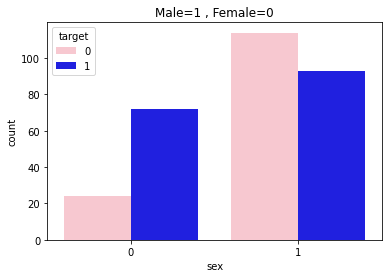

In [11]:
sns.countplot(x='sex',hue='target',data=df,palette=['pink','blue'])
plt.title('Male=1 , Female=0')
#more males had heart disease than females

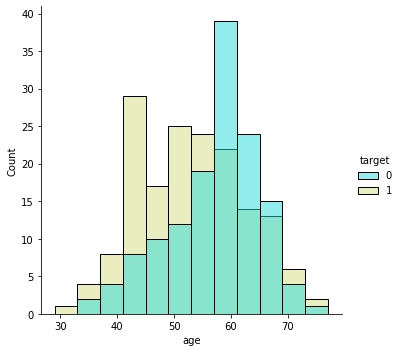

In [22]:
sns.displot(x='age',hue='target',data=df,palette='rainbow')
#indicates that the majority of data lies at the age groups pf 40-50 , 50-60
#the majority of people who have heart disease lie in an age group of 40-55
#the majority of people who do not have heart disease lie in an age group of 50-70

<AxesSubplot:xlabel='cp', ylabel='age'>

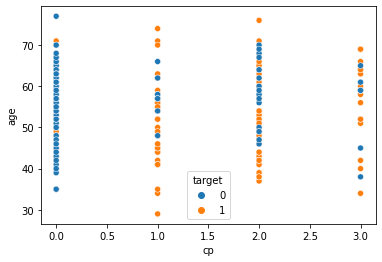

In [14]:
sns.scatterplot(x='cp',y='age',data=df,hue='target')

In [17]:
#higher values of chestpain are strongly correlated with presence of heart disease. most of the people having zero chest pain 
#have no heart disease
print(df['cp'].corr(df['target']))

0.4337982615068934


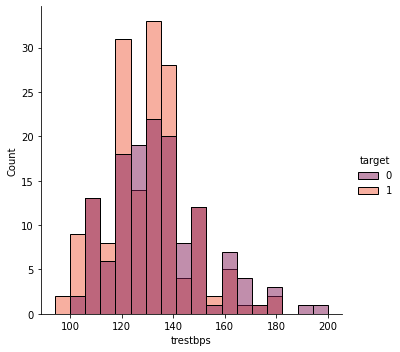

In [24]:
sns.displot(x='trestbps',data=df,hue='target',palette='rocket')

<AxesSubplot:xlabel='trestbps', ylabel='age'>

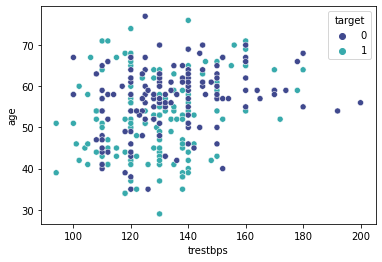

In [29]:
sns.scatterplot(x='trestbps',y='age',hue='target',data=df,palette='mako')
#as the resting blood pressure increases , there's less chances of occurence of heart disease (most presences lie between 110-160)

-0.4367570833533018


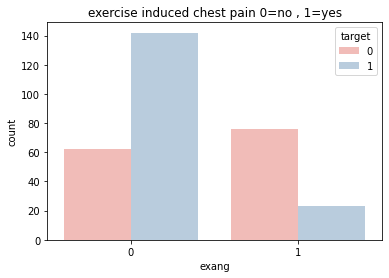

In [39]:
sns.countplot(x='exang',data=df,palette='Pastel1',hue='target')
plt.title('exercise induced chest pain 0=no , 1=yes')
print(df['exang'].corr(df['target']))
#more cases of heart disease were found when exercise induced angina was not present

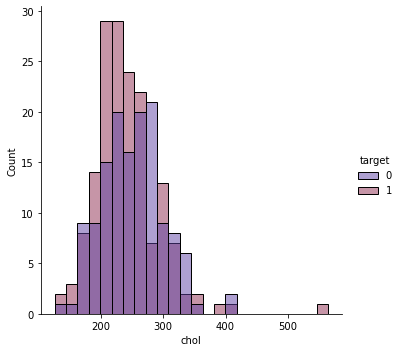

In [58]:
sns.displot(x='chol',data=df,hue='target',palette='twilight')


In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'],axis=1), df['target'], test_size=0.25, random_state=0)

In [71]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)
logit.predict(x_test)
score = logit.score(x_test, y_test)
print(score)

0.8421052631578947


C:\Users\arvin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=2)

In [74]:
knn_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [79]:
pred=knn_model.predict(x_test)

In [80]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

ValueError: Classification metrics can't handle a mix of binary and continuous targets